In [2]:
from google.colab import files
file1=files.upload()

Saving Train.csv to Train.csv


In [0]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
#import warning

data = pd.read_csv("/content/Train.csv",error_bad_lines=False)

data["year"] = data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[0])
data["month"] = data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[1])
data["day"] = data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[2])
data["time"] = data["date_time"].apply(lambda x : x.split(" ")[1].split(":")[0])
data["day_of_week"] = pd.DatetimeIndex(data["date_time"].apply(lambda x : x.split(" ")[0])).dayofweek
data["snow_p_h"] = data["snow_p_h"].apply(lambda x : 1 if x!=0 else 0)          
data["wind_direction"] = data["wind_direction"].apply(lambda x : x//90)
data["wind_direction"] = data["wind_direction"].apply(lambda x : 0 if x == 4 else x)
data["speed_temp"] = np.sqrt(np.multiply(data["wind_speed"],data["temperature"]))

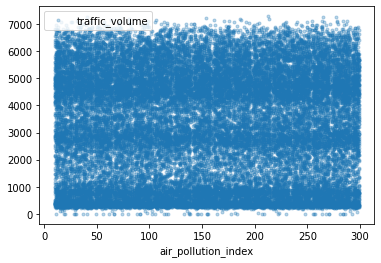

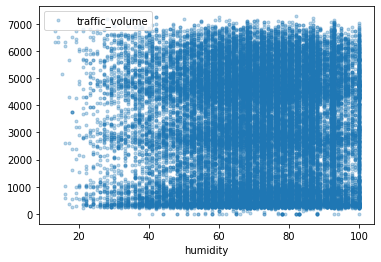

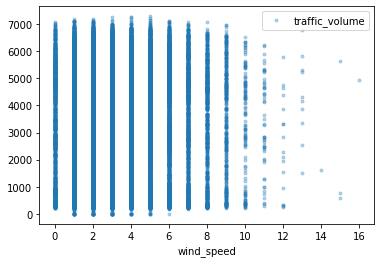

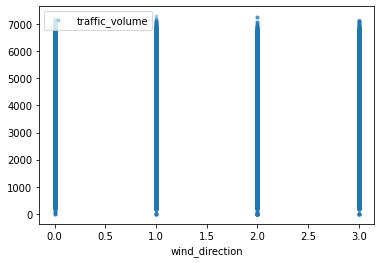

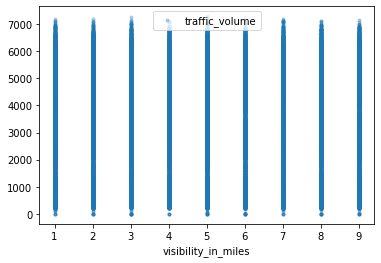

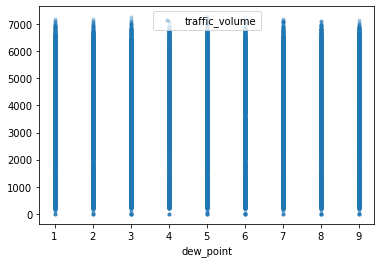

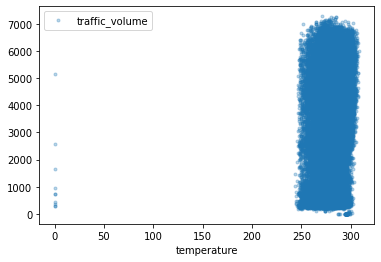

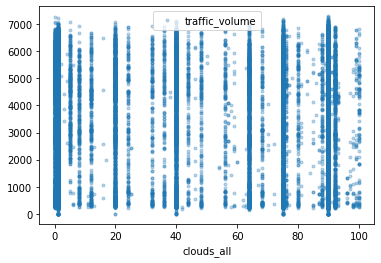

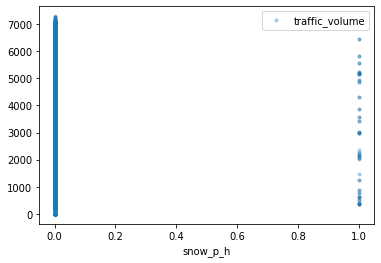

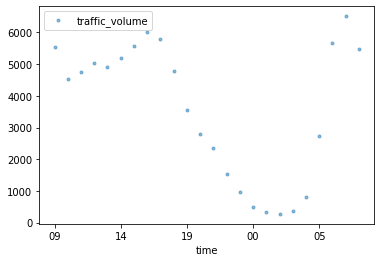

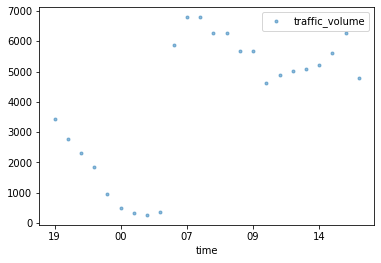

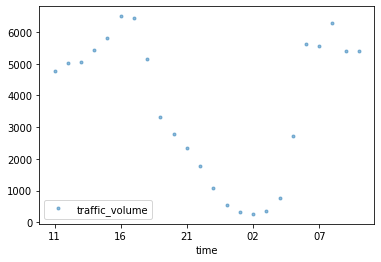

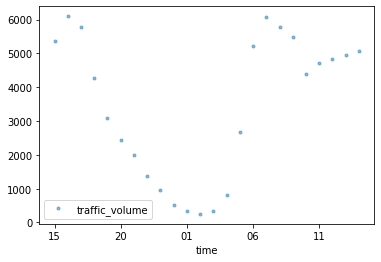

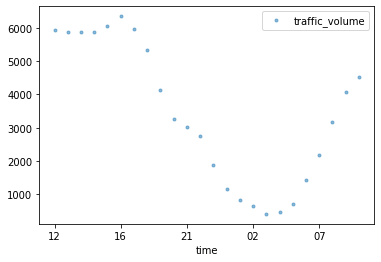

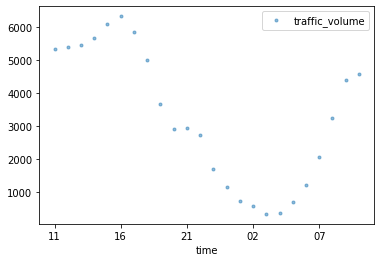

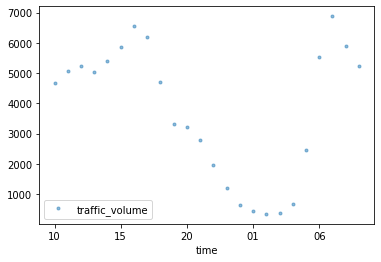

In [10]:
data.plot(x='air_pollution_index', y='traffic_volume', style='.', alpha=.3)
data.plot(x='humidity', y='traffic_volume', style='.', alpha=.3)
data.plot(x='wind_speed', y='traffic_volume', style='.', alpha=.3)
data.plot(x='wind_direction', y='traffic_volume', style='.', alpha=.3)
data.plot(x='visibility_in_miles', y='traffic_volume', style='.', alpha=.3)
data.plot(x='dew_point', y='traffic_volume', style='.', alpha=.3)
data.plot(x='temperature', y='traffic_volume', style='.', alpha=.3)
data.plot(x='clouds_all', y='traffic_volume', style='.', alpha=.3)
data.plot(x='snow_p_h', y='traffic_volume', style='.', alpha=.3)
for i in range(7):
    data[168*i:168*i+24].plot(x='time', y='traffic_volume', style='.', alpha=.5)

In [11]:
time_arr = data["time"].values
c=0
for t in range(len(time_arr)-1):
    if int(time_arr[t+1])==int(time_arr[t]):
			#         print(str(t)+" "+str(time_arr[t])+" "+str(time_arr[t+1]))
            c+=1
		# taking holiday as a feature

for i in range(len(data)):
    if data.at[i,"is_holiday"] != "None":
        d = str(data.at[i,"date_time"].split(" ")[0])
        j=i
        while str(data.at[j,"date_time"].split(" ")[0])==d:
        	data.at[j,"is_holiday"] = 1
        	j+=1
    else:
        data.at[i,"is_holiday"] = 0
		#adding dummy values
data = pd.get_dummies(data, columns = ["day_of_week", "month", "wind_direction"], prefix_sep='_', drop_first=True)
data = data.drop_duplicates(subset=['date_time', 'traffic_volume'], keep="last")
mod_data = data.drop(columns=["date_time","traffic_volume","weather_description","weather_type","dew_point","visibility_in_miles"])

X = mod_data.values
Y = data["traffic_volume"].values

		
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8, random_state=0)

model_xgb = XGBRegressor(
                        gamma=5, 
                        learning_rate=.3,
                        max_depth=15,
                        reg_lambda=100,
                        n_estimators = 500
                        )
                         
model_xgb.fit(X_train, Y_train,eval_metric='rmse', verbose = True, eval_set = [(X_test, Y_test)])

y_pred = model_xgb.predict(X_test)

print(np.sqrt(mean_squared_error(Y_test, y_pred)*100))
print(metrics.mean_absolute_error(Y_test,y_pred)*100)
#print(model_xgb.predict([[	6,	89.36,	1.0,	0.0,	75,	4,	2012,	2,	10,	10,	0]]))

[05:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2778.55
[1]	validation_0-rmse:2058.54
[2]	validation_0-rmse:1570.39
[3]	validation_0-rmse:1247.24
[4]	validation_0-rmse:1030.67
[5]	validation_0-rmse:897.557
[6]	validation_0-rmse:805.063
[7]	validation_0-rmse:751.638
[8]	validation_0-rmse:713.643
[9]	validation_0-rmse:690.271
[10]	validation_0-rmse:669.65
[11]	validation_0-rmse:651.964
[12]	validation_0-rmse:644.178
[13]	validation_0-rmse:634.686
[14]	validation_0-rmse:616.874
[15]	validation_0-rmse:612.138
[16]	validation_0-rmse:600.19
[17]	validation_0-rmse:589.625
[18]	validation_0-rmse:581.347
[19]	validation_0-rmse:573.763
[20]	validation_0-rmse:568.359
[21]	validation_0-rmse:564.854
[22]	validation_0-rmse:562.355
[23]	validation_0-rmse:560.19
[24]	validation_0-rmse:557.92
[25]	validation_0-rmse:557.06
[26]	validation_0-rmse:556.119
[27]	validation_0-rmse:552.762
[28]	validation_0-rm

In [12]:
from google.colab import files
file1=files.upload()


Saving datasets_712785_1242343_Test.csv to datasets_712785_1242343_Test.csv


In [0]:
test_data = pd.read_csv("/content/datasets_712785_1242343_Test.csv",error_bad_lines=False)

In [0]:
test_data["year"] = test_data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[0])
test_data["month"] = test_data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[1])
test_data["day"] = test_data["date_time"].apply(lambda x : x.split(" ")[0].split("-")[2])
test_data["time"] = test_data["date_time"].apply(lambda x : x.split(" ")[1].split(":")[0])
test_data["day_of_week"] = pd.DatetimeIndex(test_data["date_time"].apply(lambda x : x.split(" ")[0])).dayofweek


test_data["snow_p_h"] = test_data["snow_p_h"].apply(lambda x : 1 if x!=0 else 0)

test_data["wind_direction"] = test_data["wind_direction"].apply(lambda x : x//90)
test_data["wind_direction"] = test_data["wind_direction"].apply(lambda x : 0 if x == 4 else x)
test_data["speed_temp"] = np.sqrt(np.multiply(test_data["wind_speed"],test_data["temperature"]))
for i in range(len(test_data)):
    if test_data.at[i,"is_holiday"] != "None":
        d = str(test_data.at[i,"date_time"].split(" ")[0])
        j=i
        while str(test_data.at[j,"date_time"].split(" ")[0])==d:
            test_data.at[j,"is_holiday"] = 1
            j+=1
    else: test_data.at[i,"is_holiday"] = 0
test_data = pd.get_dummies(test_data, columns = ["day_of_week","month","wind_direction"], prefix_sep='_', drop_first=True)


# test_data["wind_speed_sq"] = test_data["wind_speed"].apply(lambda x:x**0.5)

test_mod_data = test_data.drop(columns=["date_time","weather_description","weather_type","dew_point","visibility_in_miles"])

test_X = test_mod_data.values
pred_y = model_xgb.predict(test_X)
for i in range(len(pred_y)):
    if pred_y[i]<=0:
        sum = 0
        for j in range(10):
            sum = sum + pred_y[i-24*j]
        pred_y[i] = sum/10

In [0]:
submission = pd.DataFrame(columns = ["date_time","traffic_volume"])
submission["date_time"] = test_data["date_time"]
submission["traffic_volume"] = pred_y

In [0]:
submission.to_csv("submission.csv",index = False)